## Data Analysis in Python
Jane Rigby (Astrophysics Science Division)

Vanilla python variables (lists, tuples) are not well-suited for scientific data analysis.  Several packages have developed for real number-crunching:
* NumPy provides powerful multi-dimensional arrays and fast math.  Vectorized math is fast math!
* SciPy provides algorithms for scientific analysis (FFT, linear algebra, curve-fitting, etc).
* Pandas provides more powerful data structures that keep it all organized.

In this lecture, I assume you are already a user of NumPy, at least a little.  
* [Here is the 2016 GSFC NumPy tutorial.](https://github.com/JulesKouatchou/PBC2016/blob/master/Lectures/Day_02/02_Numpy/1DayBootCamp_Numpy.ipynb)  
* [Here is the 2016 GSFC SciPy tutorial.](https://github.com/JulesKouatchou/PBC2016/blob/master/Lectures/Day_02/04_Introduction_Scipy/PBC2016_IntroductionSciPy.ipynb)

These examples will use a combination of NumPy, SciPy, and Pandas.  
*Since Pandas is new to most people, I'll dwell on it.*

In [73]:
# NumPy in 1 minute
import numpy as np
aa = np.array((3,1,4,1,5,9))  # 1-D numpy ndarray
print type(aa)
print np.median(aa)
print np.ones_like(aa)
bb = np.zeros((3, 4))  # 2-dimensional array
print bb
# Numpy uses vectorized math, so avoid loops!

<type 'numpy.ndarray'>
3.5
[1 1 1 1 1 1]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


**What is Pandas?**  Pandas is a python library for data analysis. It uses high-level data structures, and ways to manipulate them.  Pandas comes from data science, and works (almost) seamlessly with numpy and scipy.

**Why use Pandas?**  Pandas makes it easy to manage complex data, munge data into submission, and perform scientific analysis. I've found it really fun to do science in Pandas!

**Where to get started?** I personally love the book, "Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython", by Wes McKinney, the inventor of Pandas.

In [74]:
from IPython.display import Image, HTML
import pandas  # Lots of people import pandas as pd for brevity
import astropy.convolution
from scipy.optimize import curve_fit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<img src="https://covers.oreillystatic.com/images/0636920023784/cat.gif">

**Why should you use pandas?**  Pandas makes it easy to keep track of complex datasets.  You can visualize your data, manipulate, munge out bad data, filter, fit with models, bin and group, concatenate with other datasets, and export.

Let's dive in, and meet the basic part of pandas:  **pandas.DataFrame()**
A DataFrame is like a dictionary-on-steroids.  Or like a spreadsheet with rows and columns.

In [75]:
# Loading the Keck/Nirspec spectrum of a gravitationally lensed galaxy, 
# from Wuyts, Rigby, Gladders et al. 2014, The Astrophysical Journal,  781, 61
df1 = pandas.read_table("Sample_data/rcs0327_knotU_N3_nirspeckeck.txt", delim_whitespace=True, comment="#")
df1.head()

,wave,flam,noise
0,11436.9,-1.795000e-17,5.534000e-17
1,11439.2,1.203000e-16,4.374000e-17
2,11441.4,1.857000e-17,4.261000e-17
3,11443.7,-1.751000e-16,3.584000e-17
4,11446.0,-8.348000e-17,3.160000e-17


So, df1 is a pandas dataframe that I read with read_table().  There are several read_ tools:  read_csv(), read_sql(), read_excel() ... you get the picture.  
I wrote a tutorial on [reading astronomical data with pandas.](https://github.com/janerigby/astro-pandas-tutorials/blob/master/Get%20data%20into%20pandas.ipynb)

Let's examine df1.  It looks like a spreadsheet, with rows and columns.

In [76]:
print df1.keys()
print df1.columns

Index([u'wave', u'flam', u'noise'], dtype='object')
Index([u'wave', u'flam', u'noise'], dtype='object')


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 3 columns):
wave     1121 non-null float64
flam     1107 non-null float64
noise    1121 non-null float64
dtypes: float64(3)
memory usage: 26.3 KB


In [78]:
df1.describe()

,wave,flam,noise
count,1121.000000,1.107000e+03,1.121000e+03
mean,12819.974844,1.633409e-17,2.663281e-16
std,830.235363,4.336269e-16,2.096674e-15
min,11436.900000,-1.031000e-14,0.000000e+00
25%,12096.000000,-5.886500e-19,3.083000e-18
50%,12793.100000,3.920000e-18,5.154000e-18
75%,13530.400000,1.009500e-17,1.115000e-17
max,14310.200000,4.415000e-15,5.516000e-14


In [79]:
df1.shape

(1121, 3)

In [80]:
df1.tail(3)

,wave,flam,noise
1118,14304.5,NaN,0.0
1119,14307.4,NaN,0.0
1120,14310.2,NaN,0.0


In [81]:
df1.head(2)

,wave,flam,noise
0,11436.9,-1.795000e-17,5.534000e-17
1,11439.2,1.203000e-16,4.374000e-17


In [82]:
df1.max()

wave     1.431020e+04
flam     4.415000e-15
noise    5.516000e-14
dtype: float64

In [83]:
df1['flam'].nlargest(3)

1060    4.415000e-15
1069    2.689000e-15
1037    1.624000e-15
Name: flam, dtype: float64

In [84]:
df1.isnull().head(3)

,wave,flam,noise
0,False,False,False
1,False,False,False
2,False,False,False


In [85]:
df1.isnull().sum()

wave      0
flam     14
noise     0
dtype: int64

In [86]:
# pandas.DataFrame.interpolate() can replace NaNs.  Use with care!
# pandas.dropna() can drop the NaNs.  Use with care.
df1.loc[df1['flam'].isnull()]

,wave,flam,noise
1107,14273.1,NaN,0.0
1108,14275.9,NaN,0.0
1109,14278.8,NaN,0.0
1110,14281.6,NaN,0.0
1111,14284.5,NaN,0.0
1112,14287.3,NaN,0.0
1113,14290.2,NaN,0.0
1114,14293.1,NaN,0.0
1115,14295.9,NaN,0.0
1116,14298.8,NaN,0.0


In [87]:
df1.ix[3]  # Get one row, access by the index.  Clunky

wave     1.144370e+04
flam    -1.751000e-16
noise    3.584000e-17
Name: 3, dtype: float64

In [88]:
df1['wave'].between(12793., 12799.).head()   # Boolean filter

0    False
1    False
2    False
3    False
4    False
Name: wave, dtype: bool

In [89]:
df1.loc[df1['wave'].between(12793., 12799.)]   # Using that boolean filter

,wave,flam,noise
560,12793.1,-3.087000e-18,7.239000e-18
561,12795.7,5.561000e-19,8.453000e-18
562,12798.3,9.950000e-18,1.047000e-17


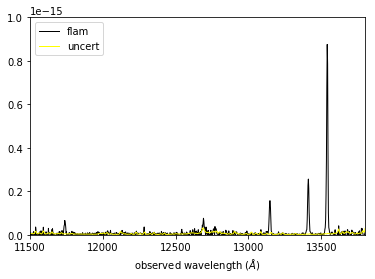

In [90]:
# Plotting shortcut:  pandas.DataFrame.plot() 
ax = df1.plot(x='wave', y='flam', color='k')
df1.plot(x='wave', y='noise', color='yellow', ax=ax, label='uncert')
plt.ylim(0,1E-15)
plt.xlim(1.15E4, 1.38E4) # Can intermix regular matplotlib commands
plt.xlabel(r"observed wavelength ($\AA$)")

In [91]:
#It's easy to add a new column to the dataframe
df1['dispersion'] = df1['wave'].diff()
df1['dispersion'].iloc[0] = df1['dispersion'][1] # Fill in the first value
df1.head(3)

,wave,flam,noise,dispersion
0,11436.9,-1.795000e-17,5.534000e-17,2.3
1,11439.2,1.203000e-16,4.374000e-17,2.3
2,11441.4,1.857000e-17,4.261000e-17,2.2


(11500.0, 13800.0)

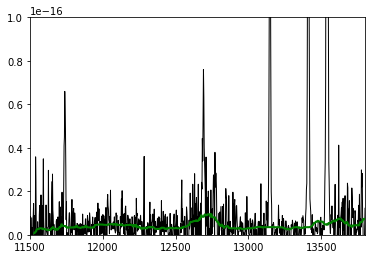

In [92]:
df1['smooth'] = df1['flam'].rolling(window=81, center=True).median()  # Rolling functions
plt.plot(df1['wave'], df1['flam'], color='k')        # Plotting in regular matplotlib
plt.plot(df1['wave'], df1['smooth'], color='green', lw=2)  # Smoothing example
plt.ylim(0,0.1E-15)
plt.xlim(1.15E4, 1.38E4)

In [93]:
# A pandas.Series() is a column (or a row) of a Pandas DataFrame
example_series = df1.loc[df1['wave'].between(12793., 12799.)]['wave']
print example_series

560    12793.1
561    12795.7
562    12798.3
Name: wave, dtype: float64


In [94]:
# NumPy should work flawlessly on a Pandas Series or Dataframe
print np.median(df1['wave']),   df1['wave'].median()

12793.1 12793.1


In [95]:
# as_matrix() converts a pandas.Series or DataFrame to a numpy ndarray:
print example_series.as_matrix()
print type(example_series.as_matrix())

[ 12793.1  12795.7  12798.3]
<type 'numpy.ndarray'>


In [96]:
# Some astropy and scipy functions will barf at a pandas.Series.  as_matrix() is the workaround
boxcar = 21
# This should barf:
#smooth1 = astropy.convolution.convolve(df1['flam'], np.ones((boxcar,))/boxcar, boundary='extend', fill_value=np.nan)
# But this should work:
smooth1 = astropy.convolution.convolve(df1['flam'].as_matrix(), np.ones((boxcar,))/boxcar, boundary='extend', fill_value=np.nan)

In [97]:
df1.dropna().shape

(1027, 5)

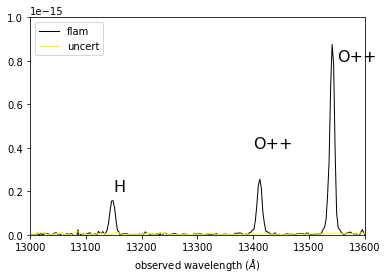

In [98]:
# Hack time:  
# Fit the emission lines!  Measure the integrated flux of each emission line.
# Bonus points: with uncertainties!
# Hint #1: You may want to use scipy.optimize.curve_fit()
# Hint #2: Unlike Pandas, scipy doesn't like NaN.  pandas.DataFrame.interpolate() or .dropna() can help
rest_waves = np.array((4862.683, 4960.295, 5008.240))
ax = df1.plot(x='wave', y='flam', color='k')
df1.plot(x='wave', y='noise', color='yellow', ax=ax, label='uncert')
plt.ylim(0,1E-15)
plt.xlim(1.3E4, 1.36E4) 
plt.annotate("H", xy=(1.315E4,0.2E-15), xycoords='data', fontsize=16)
plt.annotate("O++", xy=(1.34E4,0.4E-15), xycoords='data', fontsize=16)
plt.annotate("O++", xy=(1.355E4,0.8E-15), xycoords='data', fontsize=16)
plt.xlabel(r"observed wavelength ($\AA$)")
##### REMOVE BELOW HERE FOR JANE'S SOLUTION